# Equilibrium

Prepared for the Keio Zemi of Ippei Fujiwara

Written by John Stachurski

In [3]:
%matplotlib inline

First we import some functionality from the scientific libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import bisect

Now let's write routines to compute supply and demand as functions of price and parameters:

In [5]:

def supply(p, b):
    return np.exp(b * p) - 1

def demand(p, a, epsilon):
    return a * p**(-epsilon)



Next we'll write a function that takes a parameter set and returns a market clearing price via bisection:

In [6]:
from scipy.optimize import bisect

def compute_equilibrium(a, b, epsilon):
    plow = 0.1
    phigh = 10.0
    def excess_supply(p):
        return supply(p, b) - demand(p, a, epsilon)
    pclear = bisect(excess_supply, plow, phigh)
    return pclear

Let's test it with the original parameter set, the market clearing price for which was 2.9334.  The parameters are

$$ a = 1, \quad b = 0.1, \quad \epsilon = 1 $$

In [7]:
compute_equilibrium(1, 0.1, 1)

2.9334108855344145

In [8]:
compute_equilibrium(1, 0.1, 1.45)

2.433107128867579

### Exercise

For $\epsilon$ in a grid of values between 1.0 and 1.5, plot the equilibrium price for each $\epsilon$.

One problem is that you need to **loop**.  That is, you need to evaluate "compute_equilibrium" for lots of different $\epsilon$.  Here's a hint on how you might try that.

In [17]:
def f(x):
    out = "negative" if x < 0 else "nonnegative"
    return out

vals = np.linspace(-1, 1, 5)

In [18]:
vals

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [19]:
[f(v) for v in vals]

['negative', 'negative', 'nonnegative', 'nonnegative', 'nonnegative']

### Solution

In [10]:
for i in range(40):
    print("The solution is below")

The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below
The solution is below


(1.0, 1.5)

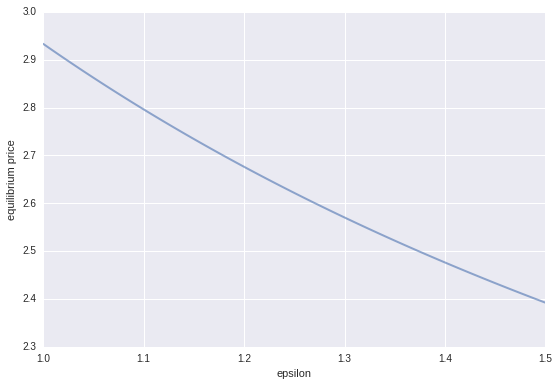

In [11]:
import seaborn as sb  # just to make it look pretty

a, b = 1, 0.1

fig, ax = plt.subplots(figsize=(9, 6))
epsilon_grid = np.linspace(1, 1.5, 100)

prices = [compute_equilibrium(a, b, epsilon) for epsilon in epsilon_grid]

ax.plot(epsilon_grid, prices, lw=2, alpha=0.6)
ax.set_xlabel("epsilon")
ax.set_ylabel("equilibrium price")
ax.set_xlim(1.0, 1.5)